## **Lab 8 - KMeans Clustering**
### S Kailash 18MIS1074 
### SWE4012 Machine Learning (L11+L12)
### Faculty : Dr. M Premlatha
### Date : 8th March 2022

In this experiment, we will be dealing with driver dataset; where we cluster the driver data into 4 clusters, and we use the iris dataset to cluster the species into different clusters.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/JangirSumit/data_science/master/8th%20June%20Assignments/case%20study%201/driver-data.csv')
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [7]:
kmeans = KMeans(n_clusters=4)
print(kmeans.fit(data))
print(kmeans.cluster_centers_)
kmeans.labels_

KMeans(n_clusters=4)
[[3.42331197e+09 7.78103774e+01 1.10218471e+01]
 [3.42331396e+09 7.49473014e+01 1.09439919e+01]
 [3.42331096e+09 7.76455305e+01 1.02180747e+01]
 [3.42331297e+09 7.36854381e+01 1.07109768e+01]]


array([0, 3, 1, ..., 3, 1, 0])

In [9]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
data["cluster"] = kmeans.labels_

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python39\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


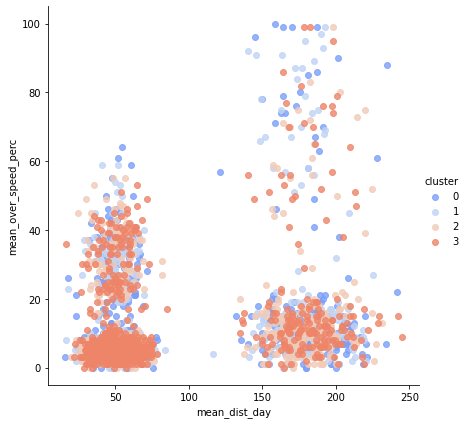

In [10]:
sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=data, hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)

In [11]:
kmeans.inertia_

345665004.96308565

In [13]:
kmeans.score
data

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,0
1,3423313212,52.53,25,3
2,3423313724,64.54,27,1
3,3423311373,55.69,22,2
4,3423310999,54.58,25,2
...,...,...,...,...
3995,3423310685,160.04,10,2
3996,3423312600,176.17,5,3
3997,3423312921,170.91,12,3
3998,3423313630,176.14,5,1


Now, let us see how it clusters for the Iris dataset.

In [25]:
iris=pd.read_csv('Iris.csv')
x = iris.iloc[:, [0, 1, 2, 3]].values

iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [27]:
iris_outcome = pd.crosstab(index=iris["Species"],columns="count")      # Name the count column
iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [28]:
iris_setosa=iris.loc[iris["Species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["Species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["Species"]=="Iris-versicolor"]

C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

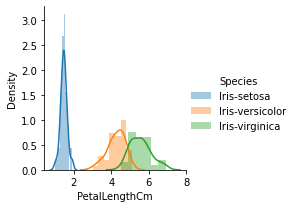

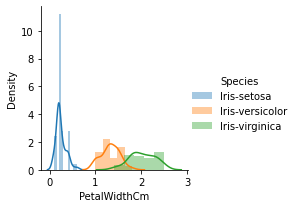

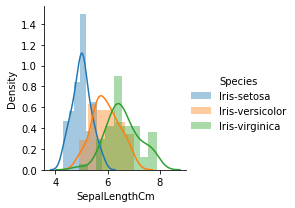

In [30]:
sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"PetalLengthCm").add_legend()
sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"PetalWidthCm").add_legend()
sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"SepalLengthCm").add_legend()
plt.show()

In [37]:
ikmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = ikmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [38]:
ikmeans.inertia_
print(ikmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


It has a better inertia compared to the previous dataset, therefore the clusters are much closer to each other. It has a better performance compared to the previous dataset.

In [39]:
unique, counts = np.unique(ikmeans.labels_, return_counts=True)
iris["cluster"] = ikmeans.labels_
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1


Therefore, since the inertia is lesser for Iris dataset, KMeans has performed better for the iris dataset compared to the driver dataset.

Thank You!